In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1. Load the dataset
df = pd.read_csv('data_15.csv')

# 2. Check for missing values
print(df.isnull().sum())

# 3. Fill missing values with mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 4. Encoding categorical variables
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Country'] = le.fit_transform(df['Country'])

# 5. Print out the preprocessed dataframe and save
print(df.head())
df.to_csv('preprocessed_data_15.csv', index=False)

# 6. Oversample the minority class using SMOTE
sm = SMOTE(random_state=42)
X = df.drop(columns='US') # 'US' is the target column to predict
y = df['US']
X_res, y_res = sm.fit_resample(X, y)
# Create a new dataframe with resampled data
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['US'])], axis=1)

# 7. Print out the preprocessed dataframe and save
print(df_resampled.head())
df_resampled.to_csv('new_data_15.csv', index=False)

City                                                               0
Country                                                            0
Cost.of.Living.Index                                               0
Rent.Index                                                         0
Cost.of.Living.Plus.Rent.Index                                     0
Groceries.Index                                                    0
Restaurant.Price.Index                                             0
Local.Purchasing.Power.Index                                       0
Milk(regular)(1 liter)                                             0
Monthly.Pass(regular; local transport)                             0
Apartment(1.bedroom).in.City.Centre                                0
Internet(10 Mbps; Unlimited Data; Cable/ADSL)                      0
Cappuccino(regular; in restaurant)                                 0
Water(0.33 liter bottle; in restaurant)                            0
Eggs(12)                          

指数是相对于纽约市（NYC）的，也就是说对于纽约市，每个指数的值应为100%。例如，如果另一个城市的租金指数为120，意味着该城市的平均租金比纽约市贵20%，而如果指数为70，则意味着该城市的平均租金比纽约市便宜30%。

生活成本指数（不包括租金）：相对于纽约市的消费品价格指标，包括食品杂货、餐馆、交通和公用事业费用。生活成本指数不包括租金或抵押贷款等住房费用。
租金指数：该城市租房价格与纽约市的比较估算。
生活成本加租金指数：包括租金在内的消费品价格与纽约市的比较估算。
食品杂货指数：该城市食品杂货价格与纽约市的比较估算。
餐馆指数：餐厅和酒吧中的餐饮价格与纽约市的比较估算。
当地购买力：该城市平均净薪资的购买力相对于购买该城市的商品和服务。如果当地购买力为40，那么该城市的居民以平均工资能够购买的商品和服务比纽约市的居民少60%。
US：数值1表示该城市位于美国，数值0表示该城市位于美国以外的地区。

在这个项目中，我们首先加载了数据集"data_15.csv"。然后我们检查了数据集中的缺失值，并用每列的众数填充了缺失值。对于数据预处理的另一步，我们对'City'和'Country'两个类别变量进行了编码处理。预处理的数据集被打印出来并保存为'preprocessed_data_15.csv'。

然后，我们使用SMOTE方法来过采样目标列'US'中的少数类，以处理数据不平衡的问题。通过合并过采样后的特征X和目标y，我们得到了新的数据框df_resampled，并将其保存为'new_data_15.csv'。

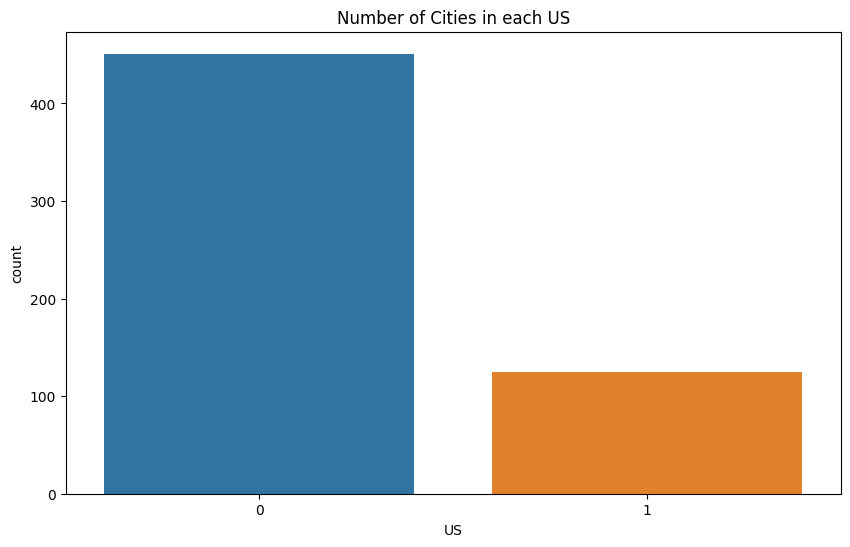

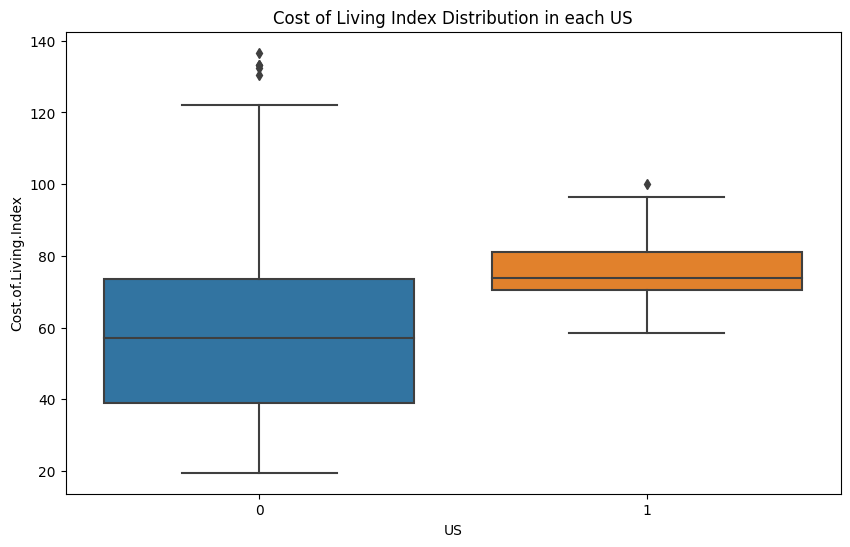

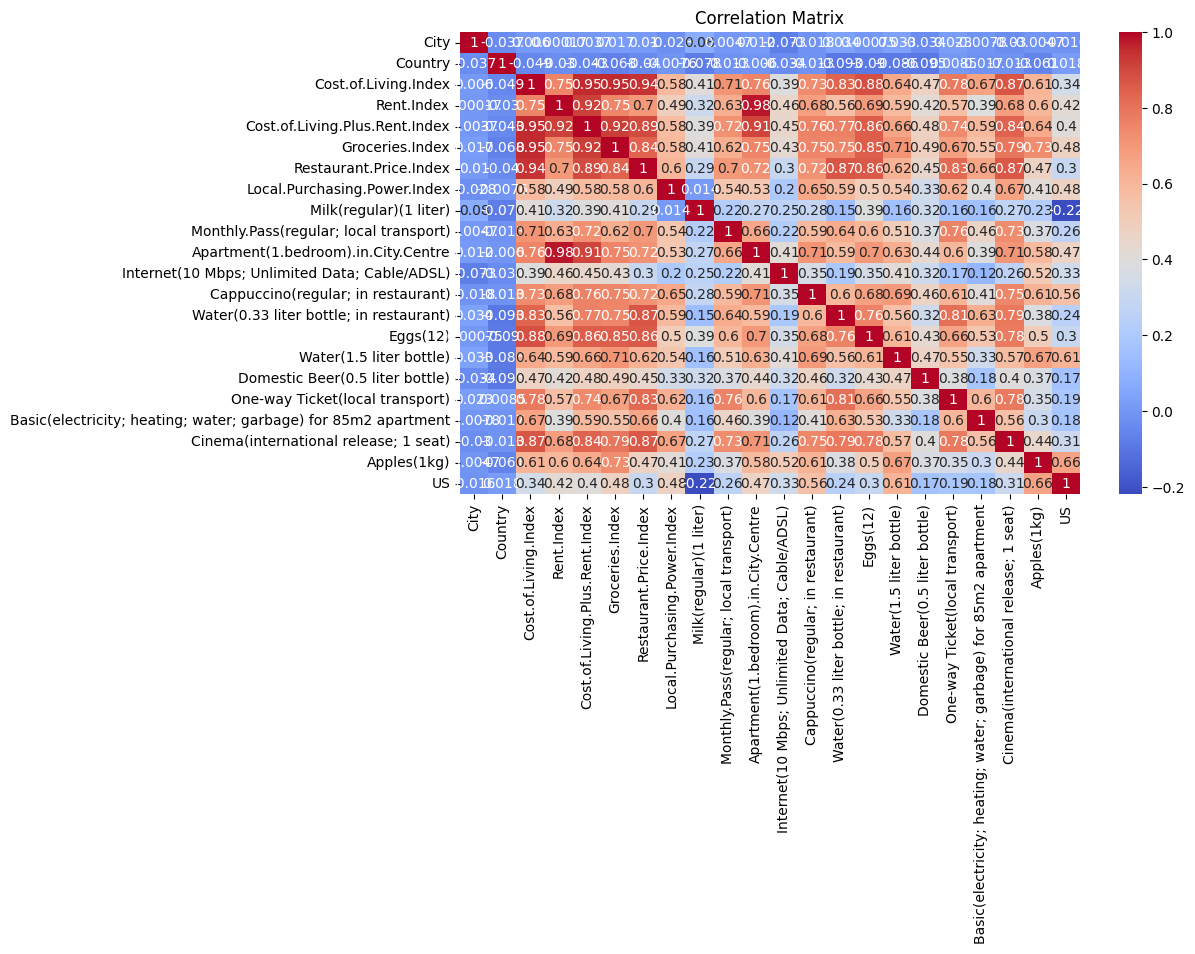

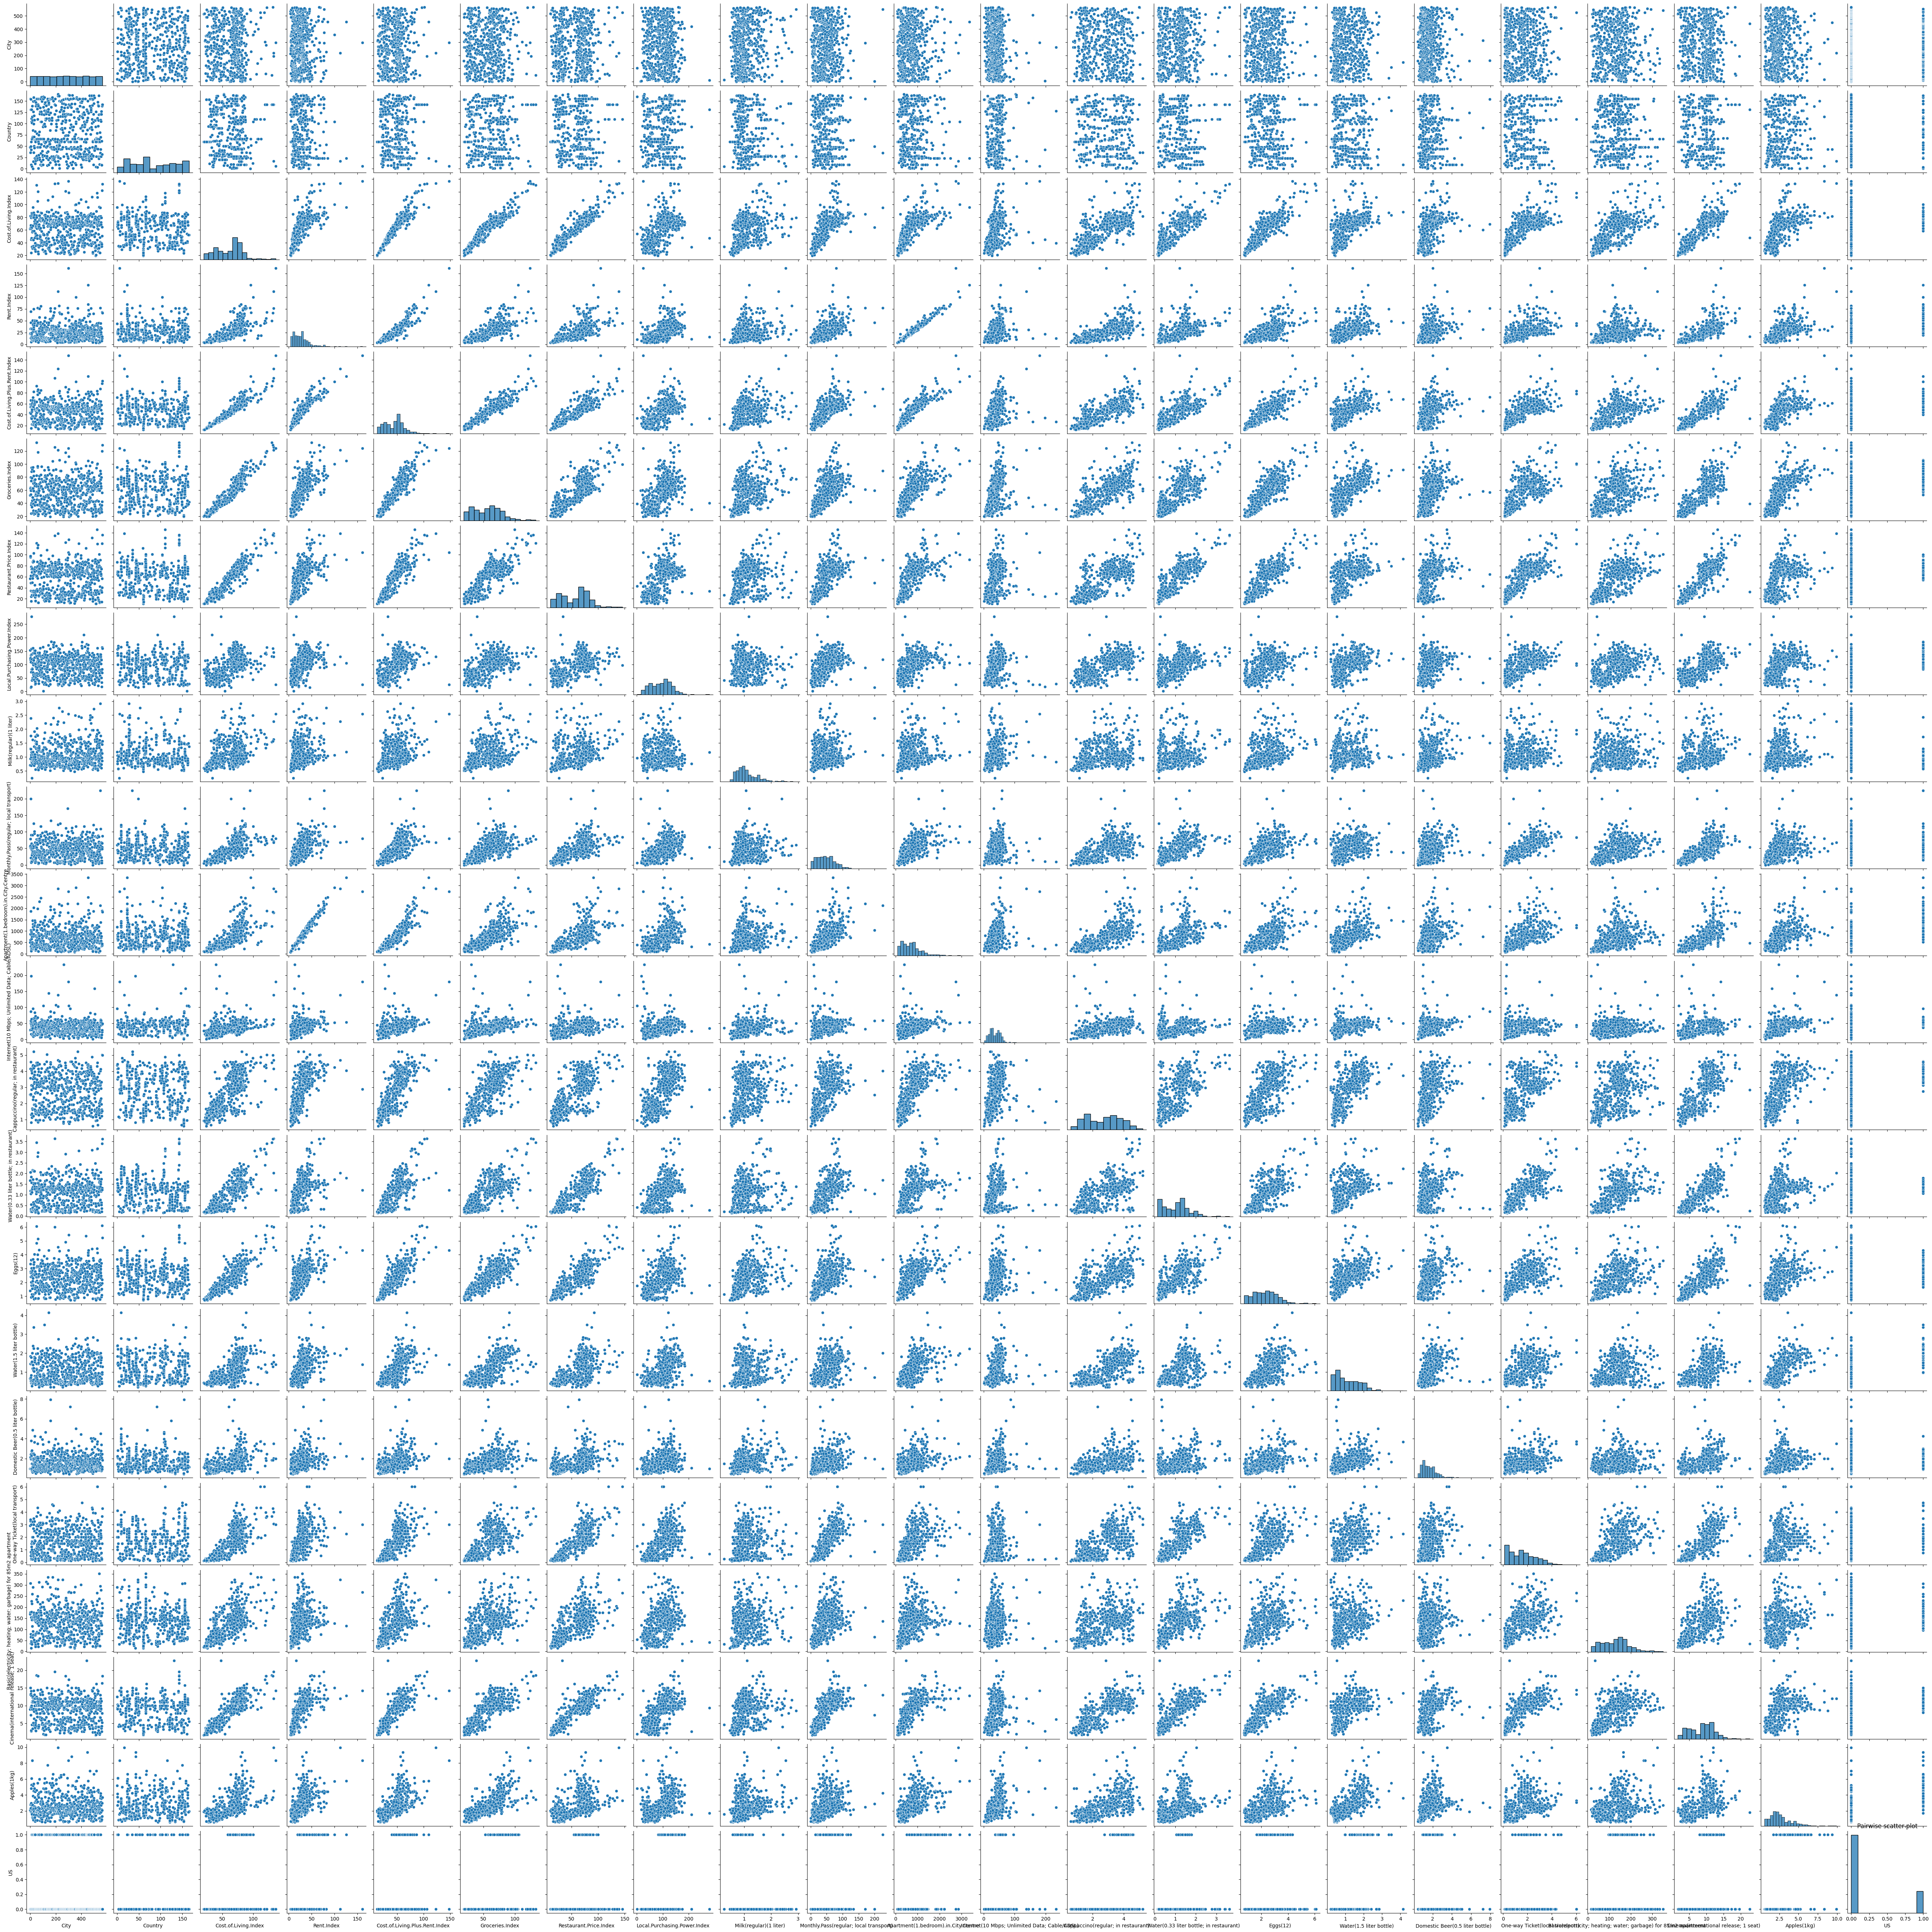

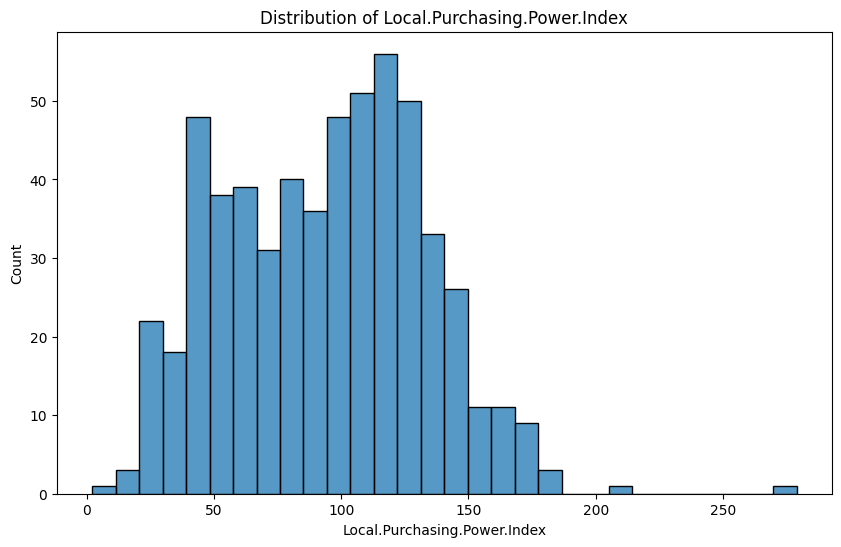

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('preprocessed_data_15.csv')

# 1. Bar Plot for Country
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='US')
plt.title('Number of Cities in each US')
plt.show()

# 2. Box Plot for Cost of Living Index
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='US', y='Cost.of.Living.Index')
plt.title('Cost of Living Index Distribution in each US')
plt.show()

# 3. Heatmap
# Create a copy of the dataframe only with numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Scatter Plot
# Pairwise scatter plot
sns.pairplot(df_numeric)
plt.title('Pairwise scatter plot')
plt.show()

# 5. Histogram for Groceries Index
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Local.Purchasing.Power.Index', bins=30)
plt.title('Distribution of Local.Purchasing.Power.Index')
plt.show()

条形图（Bar Plot）：它可以帮助我们理解每个美国城市的数量。
箱型图（Box Plot）：它可以帮助我们理解每个美国城市的生活成本指数分布。
热力图（Heatmap）：用于显示特征之间的相关性。
散点图（Scatter Plot）：可以查看两个特征之间的关系，例如生活成本指数和本地购买力指数。
直方图（Histogram）：可以帮助我们理解本地购买力指数的分布情况。

如何理解箱型图（Box Plot）：
箱型图（Box Plot）是一种用于展示数据分布情况的图形，包括中位数、四分位数、极值等统计量。以下是一个箱型图的主要组成部分：
箱子的上边缘和下边缘分别表示上四分位数（Q3，即75%分位数）和下四分位数（Q1，即25%分位数）。箱子的长度（Q3-Q1）被称为四分位距，表示数据的中间50%的分布范围。
箱子中间的线（通常是绿色或黑色）表示数据的中位数（即50%分位数）。
上下两个“须”（T形的线）表示数据的极值（最大值和最小值）。然而，这并不总是包含所有数据，异常值（离群点）通常不包括在内。
离群点通常用点或其他符号表示。它们表示的是那些超过上边缘或下边缘一定距离的值（通常是1.5倍的四分位距）。

直方图和条形图的区别：
直方图用来展示连续变量的分布，即展示在一个范围（或"桶"）中的观察次数。这些桶或范围是自动创建的。
条形图通常用于比较类别变量。每个条形代表一个类别，高度代表其频率或计数。

在数据分析和可视化部分，我们使用'seaborn'和'matplotlib'库生成了各种图表，以更好地理解数据和发现潜在的模式。首先，我们绘制了一个柱状图，显示了每个'US'类别中的城市数量。然后，我们创建了一个箱型图，展示了每个'US'类别的生活成本指数分布。为了了解各个数字特征之间的关系，我们创建了一个热力图显示相关性矩阵，并进行了成对的散点图分析。最后，我们绘制了一个直方图，显示了'Local.Purchasing.Power.Index'的分布。

从我们的分析中，我们能观察到以下几点。首先，'US'列的类别在数据集中的分布存在不均衡，这就解释了为什么我们需要使用SMOTE来过采样少数类。其次，生活成本指数在各'US'类别中的分布可能存在显著差异，这意味着'US'可能是一个影响生活成本指数的重要因素。最后，根据热力图，我们可以看出一些特征之间存在较强的相关性，这可能影响到后续模型的效果。

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv('new_data_15.csv')

# select features and target
X = df.drop(columns=['US'])  # 'US' is the target column
y = df['US']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.988950276243094


在分类任务中，我们的目标是预测'US'列，所以我们将'US'设置为目标变量y，将其他所有列作为特征X。然后我们将数据集划分为训练集和测试集，用训练集拟合随机森林分类器模型，用测试集进行预测。最后，我们使用准确率作为评估指标，得到了模型的分类精度。

Mean Squared Error: 232.37092480549296
Root Mean Squared Error: 15.243717552011155
Mean Absolute Error: 11.20235991634358
Coefficient of Determination (R^2): 0.8264840349563265


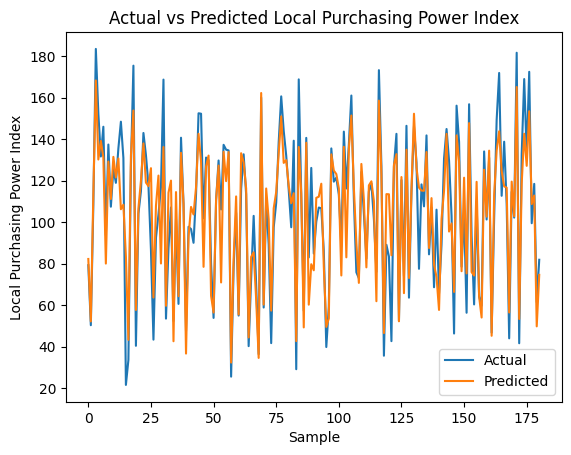

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

df = pd.read_csv('new_data_15.csv')

# Select features and target
X = df.drop(columns=['Local.Purchasing.Power.Index']) 
y = df['Local.Purchasing.Power.Index']  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('Coefficient of Determination (R^2):', r2)

import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
plt.figure()

# Plot the actual values
plt.plot(np.arange(len(y_test)), y_test, label='Actual')

# Plot the predicted values
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')

# Set the labels and title
plt.xlabel('Sample')
plt.ylabel('Local Purchasing Power Index')
plt.title('Actual vs Predicted Local Purchasing Power Index')

# Add a legend
plt.legend()

# Display the plot
plt.show()

在回归任务中，我们的目标是预测'Local.Purchasing.Power.Index'列，所以我们将'Local.Purchasing.Power.Index'设置为目标变量y，将其他所有列作为特征X。然后我们同样将数据集划分为训练集和测试集，用训练集拟合随机森林回归器模型，用测试集进行预测。最后，我们使用均方误差(MSE)、均方根误差(RMSE)、平均绝对误差(MAE)和决定系数(R^2)作为评估指标，得到了模型的回归性能。